In [2]:
from ipywidgets import widgets
from IPython.display import display,Javascript
from tkinter import Tk
from tkinter.filedialog import askdirectory
import os, time
import datetime
import operator
import sys
sys.path.append("/Users/aishp/Documents/GitHub/Behavior_GoNogo_Python")

import PreProcess
path = askdirectory(title='Select Folder') # shows dialog box and return the path

This ipython notebook gives an overview of the performance of the animals while they were trained in the Go/Nogo task. You can choose an animal and view their performance over different training phases.

In [3]:
def update_Cohort(*args):
    temp = Animals.value
    Animals.unobserve(action, 'value')
    if cohort.value==3:
        Animals.options = [('K','K'),('L','L')]
        #Animals.value = 'K'   
    if cohort.value==4:
        Animals.options = [('Jan','Jan'),('Feb','Feb'),('Mar','Mar'),('Apr','Apr'),('May','May'),('Jul','Jul'),('Aug','Aug'),('Sep','Sep'),('Okt','Okt'),('Nov','Nov')]
        #Animals.value = 'Jan'
    if cohort.value==5:
        Animals.options = [('Bil','Bil'),('Raf','Raf'),('Tat','Tat'),('Did','Did'),('Pip','Pip')]
        #Animals.value = 'Bil'
    if str(temp) in Animals.options:
        Animals.value = temp
        
    Animals.observe(action, 'value')
    action()

def action(*args):
    print('The chosen animal is ' + Animals.value)
    
cohort = widgets.Dropdown(
    options=[ ('Three', 3),('Four',4),('Five',5)],
    value=3,
    description='Cohort:',
)
Animals = widgets.Dropdown(options = [('K','K'),('L','L')],value = 'K',description = 'Animals in the cohort:')
display(cohort,Animals)
cohort.observe(update_Cohort,'value')
Animals.observe(action,'value')

Dropdown(description='Cohort:', options=(('Three', 3), ('Four', 4), ('Five', 5)), value=3)

Dropdown(description='Animals in the cohort:', options=(('K', 'K'), ('L', 'L')), value='K')

The chosen animal is Jan
The chosen animal is Jul


The next script will plot the performance of the chosen animal over days. This will give an idea about how their performance changed over training. 
        

In [6]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Plot training performance for the chosen animal")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Plot training performance for the chosen animal', style=ButtonStyle())

In [7]:
tmp2 = Animals.value
file_loc=list()
time_loc = list()
for path1, currentDirectory, files in os.walk(path):
    for file in files:
        if cohort.value==4:
            if file==tmp2.upper():
                file_loc.append(os.path.join(path1, file))
                time_loc.append(datetime.datetime.strptime(time.ctime(os.path.getmtime(os.path.join(path1, file))), "%a %b %d %H:%M:%S %Y"))
        else:
            if file==tmp2:
                file_loc.append(os.path.join(path1, file))
                time_loc.append(datetime.datetime.strptime(time.ctime(os.path.getmtime(os.path.join(path1, file))), "%a %b %d %H:%M:%S %Y"))
enu_time = enumerate(time_loc)
sorted_time = sorted(enu_time,key=operator.itemgetter(1))
sorted_indices = [index for index, element in sorted_time]
sorted_file = [file_loc[i] for i in sorted_indices]
D=list()
E=list()
A=list()
B=list()
overall_perf = list()
go_perf = list()
nogo_perf = list()
omissions = list()
f_name = list()
n_lvr_prss = list()
imaging = list()
lever_out = list()
for i_files in sorted_file:
    tmp_d,tmp_e,tmp_a,tmp_b,tmp_f_name = PreProcess.ParseMedPC(i_files)
    D.append(tmp_d.tolist())
    E.append(tmp_e.tolist())
    A.append(tmp_a.tolist())
    B.append(tmp_b.tolist())
    n_lvr_prss.append(tmp_a[16])
    lever_out.append(tmp_a[17])
    tmp_overall_perf = tmp_b[2]*100/(tmp_b[1] - tmp_b[16])
    overall_perf.append(tmp_overall_perf.tolist())
    tmp_go_perf = tmp_b[27]
    tmp_nogo_perf = tmp_b[24]
    tmp_omissions = tmp_b[16]*100/tmp_b[1]
    go_perf.append(tmp_go_perf.tolist())
    nogo_perf.append(tmp_nogo_perf.tolist())
    omissions.append(tmp_omissions.tolist())
    f_name.append(tmp_f_name)
    imaging.append(tmp_a[8])
first_go_session = f_name.index('MSN: BB_G_NG_REW_PUN_2\n')
first_reversal_session = f_name.index('MSN: BB_G_NG_REW_PUN_4\n')
first_multipress_session = [ n for n,i in enumerate(n_lvr_prss) if i>1 ][0]
imaging_sessions = [ n for n,i in enumerate(imaging) if i==1 ]
first_lever_out = [ n for n,i in enumerate(lever_out) if i==1 ][0]

/var/folders/5y/9mvf_tdx3rzggqx_qkf8jltcqs6lds/T/ipykernel_59414/587057925.py:38: RuntimeWarning: invalid value encountered in double_scalars
  tmp_overall_perf = tmp_b[2]*100/(tmp_b[1] - tmp_b[16])
/var/folders/5y/9mvf_tdx3rzggqx_qkf8jltcqs6lds/T/ipykernel_59414/587057925.py:42: RuntimeWarning: invalid value encountered in double_scalars
  tmp_omissions = tmp_b[16]*100/tmp_b[1]


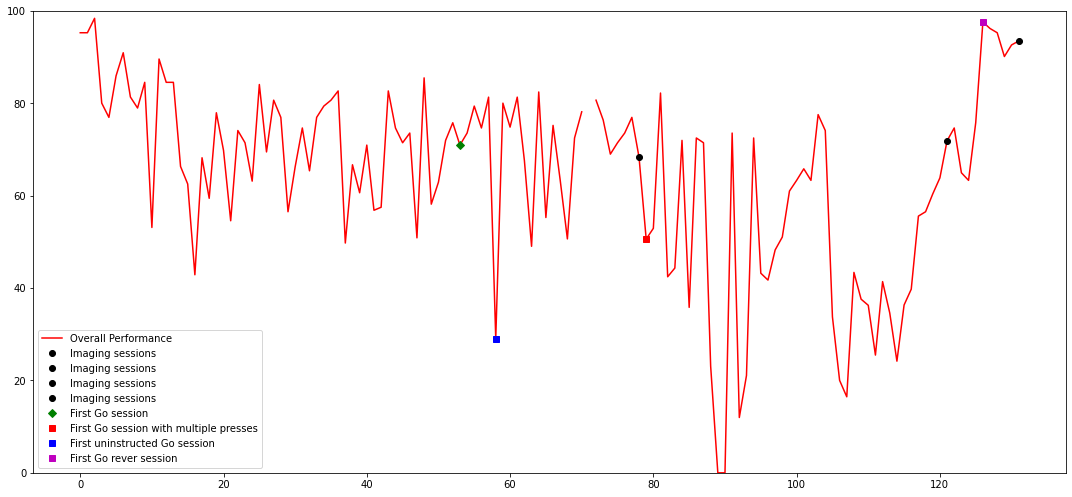

RadioButtons(options=('Clear Plot', 'Hold on'), value='Clear Plot')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
x = np.arange(len(overall_perf))
y = np.array(overall_perf)
plt.plot(x,y,'-r',label= 'Overall Performance')
plt.plot(x.take([imaging_sessions]),y.take([imaging_sessions]),'ko',label = 'Imaging sessions')
plt.plot(x.take(first_go_session),y.take([first_go_session]),'gD',label = 'First Go session')
plt.plot(x.take(first_multipress_session),y.take([first_multipress_session]),'rs',label = 'First Go session with multiple presses')
plt.plot(x.take(first_lever_out),y.take([first_lever_out]),'bs',label = 'First uninstructed Go session')
plt.plot(x.take(first_reversal_session),y.take(first_reversal_session),'ms',label = 'First Go rever session')
plt.ylim(0,100)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
plt.show()
radio_input1 = widgets.RadioButtons(options=['Clear Plot', 'Hold on'])
display(radio_input1)


In [11]:
time_loc[first_go_session]

datetime.datetime(2021, 3, 31, 11, 56, 18)

In [29]:
import scipy.io as sp
test = sp.loadmat('/Users/aishp/Dropbox/Data_rats/Cohort_4_PL/May/20210522/trials_15fps.mat')

In [17]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trials'])

In [18]:
test.trials

AttributeError: 'dict' object has no attribute 'trials'

In [49]:
test2 = test['trials'][0,5]


IndexError: index 5 is out of bounds for axis 0 with size 1

In [48]:
np.shape(test2['E'])

(1, 229)